In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

[]


In [2]:
import pandas as pd
train = pd.read_csv('c:/workspace/Data/ratings_train.csv',encoding='ms949')
test = pd.read_csv('c:/workspace/Data/ratings_test.csv',encoding='ms949')

# train = pd.read_csv('ratings_train.csv',encoding='ms949')
# test = pd.read_csv('ratings_test.csv',encoding='ms949')

In [3]:
len(train), len(test)


(150000, 50000)

In [4]:
train[:3], test[:3]

(                            document  label
 0                아 더빙.. 진짜 짜증나네요 목소리      0
 1  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
 2                  너무재밓었다그래서보는것을추천한다      0,
                                  document  label
 0                                     굳 ㅋ      1
 1                    GDNTOPCLASSINTHECLUB      0
 2  뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0)

In [5]:
train['document'].nunique(), train['label'].nunique()

(146157, 2)

In [6]:
# 중복값 제거
train.drop_duplicates(subset=['document'], inplace=True)

In [7]:
len(train)

146158

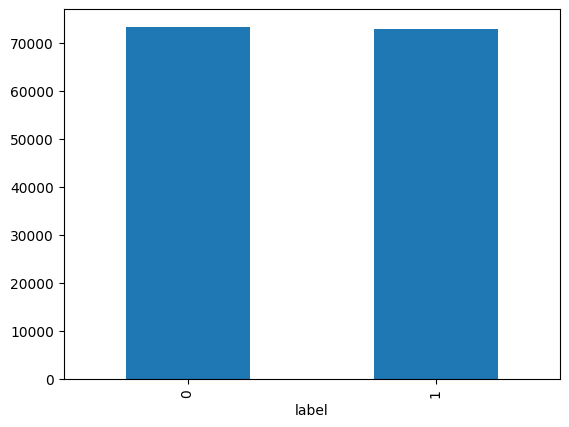

In [8]:
import matplotlib.pyplot as plt
train['label'].value_counts().plot(kind = 'bar')
plt.show()

In [9]:
train.loc[train.document.isnull()]

,document,label
25857,NaN,1


In [10]:
train = train.dropna(how = 'any') # Null 값이 존재하는 행 제거
train.isnull().values.any()

False

In [11]:
import numpy as np

# 특수문자,기호 제거
train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 공백 제거
train['document'] = train['document'].str.replace('^ +', "")
train['document'].replace('', np.nan, inplace=True)
train.isnull().sum()

document    0
label       0
dtype: int64

In [12]:
train.loc[train.document.isnull()][:3]

,document,label


In [13]:
# null 샘플 제거
train = train.dropna(how = 'any')
len(train)

146157

In [14]:
# test_data에도 동일한 과정 적용
test.drop_duplicates(subset = ['document'], inplace=True)
test['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test['document'] = test['document'].str.replace('^ +', "")
test['document'].replace('', np.nan, inplace=True)
test = test.dropna(how='any')

In [15]:
len(test)

49147

In [16]:
# 불용어 사전
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

from konlpy.tag import Okt
okt = Okt()
x_train = []

# 형태소 분석
# for sentence in train_data['document']:
for sentence in train['document'][:10000]:
    temp_x = okt.morphs(sentence, stem=True) # 토큰화
    temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
    x_train.append(temp_x)

In [17]:
print(x_train[:3])

[['아', '더빙', '..', '진짜', '짜증나다', '목소리'], ['흠', '...', '포스터', '보고', '초딩', '영화', '줄', '....', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [18]:
# 테스트 데이터에 대한 토큰화
x_test = []
#for sentence in test_data['document']:
for sentence in test['document'][:10000]:
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    x_test.append(temp_x)

In [26]:
# 정수 인코딩
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

print(tokenizer.word_index)

{'.': 1, '영화': 2, '보다': 3, '..': 4, '을': 5, '...': 6, ',': 7, '없다': 8, '이다': 9, '있다': 10, '?': 11, '좋다': 12, '다': 13, '정말': 14, '너무': 15, '재밌다': 16, '만': 17, '적': 18, '같다': 19, '되다': 20, '진짜': 21, '점': 22, '아니다': 23, '!': 24, '로': 25, '않다': 26, '에서': 27, '나오다': 28, '연기': 29, '만들다': 30, '평점': 31, '것': 32, '최고': 33, '나': 34, '인': 35, '안': 36, '~': 37, '그': 38, '내': 39, '못': 40, '....': 41, '스토리': 42, '사람': 43, '1': 44, '드라마': 45, '왜': 46, '게': 47, '보고': 48, '고': 49, '생각': 50, '감동': 51, '이렇다': 52, 'ㅋㅋ': 53, '감독': 54, '말': 55, '때': 56, '아깝다': 57, '그냥': 58, '아': 59, '배우': 60, '더': 61, '거': 62, '내용': 63, '요': 64, '재미없다': 65, '재미': 66, '지루하다': 67, '하고': 68, '재미있다': 69, '시간': 70, '!!': 71, '중': 72, '가다': 73, '자다': 74, '뭐': 75, '주다': 76, '까지': 77, '모르다': 78, '들다': 79, '10': 80, '작품': 81, '쓰레기': 82, '네': 83, '알다': 84, '수': 85, '하나': 86, '싶다': 87, '사랑': 88, '지': 89, '이건': 90, '그렇다': 91, '볼': 92, '액션': 93, '2': 94, '다시': 95, 'ㅋ': 96, '이렇게': 97, '정도': 98, '마지막': 99, '개': 100, '저': 101, '차다': 102, '

In [20]:
# 출현빈도가 3회 미만인 단어들

threshold = 3
total_cnt = len(tokenizer.word_index) # 단어수
rare_cnt = 0
total_freq = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
print(total_cnt) #단어집합 크기
print(rare_cnt) #희귀단어수

13345
8891


In [27]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(x_train) #텍스트를 숫자 시퀀스로 변환
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
print(x_train[:3])

단어 집합의 크기 : 4455
[[59, 724, 4, 21, 259, 831], [725, 6, 378, 48, 678, 2, 178, 41, 1928, 29, 942, 769, 26], [373, 1613, 3462, 3, 249, 13]]


In [28]:
y_train = np.array(train['label'][:10000])
y_test = np.array(test['label'][:10000])
max_len=max(len(l) for l in X_train) #리뷰의 최대 길이

In [29]:
cnt = 0

for s in x_train:
  if(len(s) <= 30):
      cnt = cnt + 1
# 최대 길이 이하인 샘플의 비율
(cnt / len(x_train))*100

93.58

In [30]:
x_train

[[59, 724, 4, 21, 259, 831],
 [725, 6, 378, 48, 678, 2, 178, 41, 1928, 29, 942, 769, 26],
 [373, 1613, 3462, 3, 249, 13],
 [126, 4, 226, 66, 8, 4, 31, 2848],
 [1389, 38, 29, 943, 2, 24, 1107, 27, 1481, 304, 1000, 293, 304],
 [804,
  3463,
  1001,
  1002,
  122,
  379,
  143,
  1314,
  44,
  1315,
  594,
  250,
  2,
  1,
  115,
  6,
  124,
  898,
  57,
  270,
  1],
 [317, 340, 5, 388, 524, 1],
 [124,
  898,
  57,
  288,
  28,
  318,
  106,
  1760,
  362,
  699,
  245,
  4,
  14,
  621,
  25,
  582,
  656,
  412,
  478,
  2849,
  1,
  17,
  1108,
  1108,
  4,
  45,
  299,
  8,
  29,
  40,
  43,
  17,
  770,
  944,
  83],
 [93, 8, 66, 10, 362, 120, 2],
 [1614, 31, 246, 11, 583, 92, 17, 450, 4, 1482, 402, 622, 15, 10, 11],
 [217, 9, 1, 21, 217, 9, 440],
 [1003, 451, 1109, 206, 771, 945, 2136, 772, 71, 743, 1615, 899, 2429, 9, 37],
 [2137, 156, 900, 49, 56, 1110, 355, 1059, 657, 29, 1175, 40],
 [2850,
  1254,
  12,
  1,
  832,
  1483,
  106,
  901,
  1176,
  3,
  3,
  1390,
  3464,
  1,
  3

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Dense, Flatten, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length = max_len))
model.add(Conv1D(filters = 64, kernel_size = 5, padding = 'same',activation = 'relu', strides = 1))  
# LSTM 대신에 Conv1D와 MaxPooling을 통과
# padding 사이즈를 'same'으로 하지 않으면, 사이즈가 줄어듦. same은 같은 사이즈 유지
model.add(Conv1D(filters = 32, kernel_size = 4, padding = 'same',activation = 'relu', strides = 1))
model.add(Conv1D(filters = 16, kernel_size = 3, padding = 'same',activation = 'relu', strides = 1))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['acc'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 59, 100)           445500    
                                                                 
 conv1d (Conv1D)             (None, 59, 64)            32064     
                                                                 
 conv1d_1 (Conv1D)           (None, 59, 32)            8224      
                                                                 
 conv1d_2 (Conv1D)           (None, 59, 16)            1552      
                                                                 
 max_pooling1d (MaxPooling1  (None, 11, 16)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 176)               0         
                                                        

In [33]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
mc = ModelCheckpoint('Data/result/CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.fit(x_train, y_train, batch_size = 64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 0.6118 - acc: 0.6559
Epoch 1: val_acc improved from -inf to 0.78350, saving model to CNN_model.h5
125/125 [==============================] - 4s 27ms/step - loss: 0.6118 - acc: 0.6559 - val_loss: 0.4627 - val_acc: 0.7835
Epoch 2/10
  4/125 [..............................] - ETA: 2s - loss: 0.3379 - acc: 0.8750

c:\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


123/125 [============================>.] - ETA: 0s - loss: 0.3451 - acc: 0.8524
Epoch 2: val_acc improved from 0.78350 to 0.80100, saving model to CNN_model.h5
125/125 [==============================] - 3s 23ms/step - loss: 0.3458 - acc: 0.8520 - val_loss: 0.4418 - val_acc: 0.8010
Epoch 3/10
124/125 [============================>.] - ETA: 0s - loss: 0.2200 - acc: 0.9134
Epoch 3: val_acc did not improve from 0.80100
125/125 [==============================] - 3s 24ms/step - loss: 0.2205 - acc: 0.9134 - val_loss: 0.5144 - val_acc: 0.7920
Epoch 4/10
125/125 [==============================] - ETA: 0s - loss: 0.1463 - acc: 0.9444
Epoch 4: val_acc did not improve from 0.80100
125/125 [==============================] - 3s 24ms/step - loss: 0.1463 - acc: 0.9444 - val_loss: 0.6523 - val_acc: 0.7820
Epoch 5/10
125/125 [==============================] - ETA: 0s - loss: 0.0975 - acc: 0.9640
Epoch 5: val_acc did not improve from 0.80100
125/125 [==============================] - 3s 23ms/step - loss:

In [34]:
loaded_model = load_model('Data/result/CNN_model.h5')
loaded_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4340 - acc: 0.8041


[0.4339637756347656, 0.804099977016449]

In [35]:
def review_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측
  if(score > 0.5):
    print(f"{score * 100:.2f}% 확률로 긍정 리뷰입니다.\n")
  else:
    print(f"{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다.\n")

In [36]:
review_predict('연기는 잔잔하게 볼 만 합니다')
review_predict('영화의 주제가 뭔지 모르겠음')
review_predict('익살스런 연기가 돋보였던 영화')
review_predict('기대보다는 스토리가 큰 감흥은 없습니다')

1/1 [==============================] - 0s 136ms/step
99.34% 확률로 긍정 리뷰입니다.

1/1 [==============================] - 0s 17ms/step
99.88% 확률로 부정 리뷰입니다.

1/1 [==============================] - 0s 18ms/step
99.75% 확률로 긍정 리뷰입니다.

1/1 [==============================] - 0s 18ms/step
99.94% 확률로 부정 리뷰입니다.



pooling을 'valid'로 두고, strides를 2로 늘림(듬성듬성) 할 경우, 정확도와 예측력이 떨어짐

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Dense, Flatten, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model2 = Sequential()
model2.add(Embedding(vocab_size, 100, input_length = max_len))
model2.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', strides = 2))    # 건너뜀
# LSTM 대신에 Conv1D와 MaxPooling을 통과
# padding 사이즈를 'same'으로 하지 않으면, 사이즈가 줄어듦
model2.add(Conv1D(filters = 32, kernel_size = 4, activation = 'relu', strides = 2))
model2.add(Conv1D(filters = 16, kernel_size = 3, activation = 'relu', strides = 2))
model2.add(MaxPooling1D(5))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['acc'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 59, 100)           445500    
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 64)            32064     
                                                                 
 conv1d_4 (Conv1D)           (None, 13, 32)            8224      
                                                                 
 conv1d_5 (Conv1D)           (None, 6, 16)             1552      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 16)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 16)                0         
                                                      

In [39]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
mc = ModelCheckpoint('Data/result/CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model2.fit(x_train, y_train, batch_size = 64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
122/125 [============================>.] - ETA: 0s - loss: 0.6911 - acc: 0.4994
Epoch 1: val_acc improved from -inf to 0.56550, saving model to Data/result\CNN_model.h5
125/125 [==============================] - 3s 17ms/step - loss: 0.6907 - acc: 0.5009 - val_loss: 0.6772 - val_acc: 0.5655
Epoch 2/10
 13/125 [==>...........................] - ETA: 1s - loss: 0.6517 - acc: 0.5962

c:\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - ETA: 0s - loss: 0.6102 - acc: 0.6168
Epoch 2: val_acc improved from 0.56550 to 0.59300, saving model to Data/result\CNN_model.h5
125/125 [==============================] - 2s 16ms/step - loss: 0.6102 - acc: 0.6168 - val_loss: 0.6601 - val_acc: 0.5930
Epoch 3/10
123/125 [============================>.] - ETA: 0s - loss: 0.4886 - acc: 0.6926
Epoch 3: val_acc did not improve from 0.59300
125/125 [==============================] - 2s 14ms/step - loss: 0.4876 - acc: 0.6931 - val_loss: 0.7199 - val_acc: 0.5835
Epoch 4/10
124/125 [============================>.] - ETA: 0s - loss: 0.4148 - acc: 0.7295
Epoch 4: val_acc did not improve from 0.59300
125/125 [==============================] - 2s 14ms/step - loss: 0.4147 - acc: 0.7299 - val_loss: 0.8927 - val_acc: 0.5810
Epoch 5/10
124/125 [============================>.] - ETA: 0s - loss: 0.3843 - acc: 0.7307
Epoch 5: val_acc did not improve from 0.59300
125/125 [==============================] - 2s 15ms/

In [40]:
loaded_model = load_model('Data/result/CNN_model.h5')
loaded_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6547 - acc: 0.6052


[0.65467768907547, 0.6051999926567078]

In [42]:
def review_predict2(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model2.predict(pad_new)) # 예측
  if(score > 0.5):
    print(f"{score * 100:.2f}% 확률로 긍정 리뷰입니다.\n")
  else:
    print(f"{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다.\n")

In [43]:
review_predict2('연기는 잔잔하게 볼 만 합니다')
review_predict2('영화의 주제가 뭔지 모르겠음')
review_predict2('익살스런 연기가 돋보였던 영화')
review_predict2('기대보다는 스토리가 큰 감흥은 없습니다')

1/1 [==============================] - 0s 72ms/step
50.26% 확률로 부정 리뷰입니다.

1/1 [==============================] - 0s 19ms/step
50.26% 확률로 부정 리뷰입니다.

1/1 [==============================] - 0s 17ms/step
50.26% 확률로 부정 리뷰입니다.

1/1 [==============================] - 0s 16ms/step
50.26% 확률로 부정 리뷰입니다.

